# Model Selection

Now that we have treated the imbalance issue in the training data, we can proceed to a more extensive exploration of classification algorithms. The objective of this section is to identify the best model for the problem, in order to use it for the final predictions.

The following algorithms will be tested:
- Decision Tree
- Random Forest
- K-Nearest Neighbors
- Support Vector Machine
- Logistic Regression
- Neural Network (Multi-Layer Perceptron)

For evaluating these models, we will consider several performance metrics: accuracy, F1 score and specificity. We will also look at the confusion matrix of each models. Moreover, we will divide the full training set into training and validation sets, in order to perform hyperparameter tuning.

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, ConfusionMatrixDisplay

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

In [10]:
# Load the treated dataset
df = pd.read_csv('../data/balanced.csv')
df.shape

(131839, 17)

In [11]:
df.head(10)

,sex,is_employed,income,num_vehicles,age,state_of_res,gas_usage,rooms,marital_status_Divorced/Separated,marital_status_Married,marital_status_Never married,marital_status_Widowed,housing_type_Homeowner free and clear,housing_type_Homeowner with mortgage/loan,housing_type_Occupied with no rent,housing_type_Rented,health_ins
0,1,1,-0.34,0.00,0.04,0,2.71,0.4,0,0,1,0,1,0,0,0,1
1,0,0,-0.32,0.00,0.78,0,-0.60,1.0,1,0,0,0,0,0,0,1,1
2,0,1,-0.36,0.33,0.13,0,-0.01,0.4,0,0,1,0,0,1,0,0,1
3,0,0,-0.07,0.17,0.92,0,1.27,0.2,0,0,0,1,1,0,0,0,1
4,1,1,-0.05,0.33,0.59,0,-0.60,0.2,1,0,0,0,0,0,0,1,1
5,1,0,-0.53,0.33,0.71,0,2.55,1.0,0,1,0,0,1,0,0,0,1
6,0,1,-0.28,0.33,0.06,0,-0.60,0.4,0,1,0,0,0,0,0,1,0
7,0,0,-0.12,0.33,0.67,0,0.15,0.8,0,1,0,0,1,0,0,0,1
8,0,1,-0.29,0.83,0.08,0,-0.60,0.6,0,0,1,0,1,0,0,0,1
9,1,1,-0.18,0.50,0.42,0,-0.33,1.0,0,1,0,0,0,1,0,0,1


In [12]:
# Splitting the columns into features and target
X = df.drop(['health_ins'], axis=1)
y = df['health_ins']

X.shape

(131839, 16)

In [13]:
# Divide the data into training and test sets (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [14]:
# Functio to rexeive results of a model and plot its evolution for a given parameter
def plot_measures(measures):
    parameters = measures.iloc[:,0]
    accuracy = measures.iloc[:,1]
    precision = measures.iloc[:,2]
    recall = measures.iloc[:,3]
    f1 = measures.iloc[:,4]
    spec = measures.iloc[:,5]

    sns.lineplot(x=parameters, y=accuracy, label='accuracy')
    sns.lineplot(x=parameters, y=precision, label='precision')
    sns.lineplot(x=parameters, y=recall, label='recall')
    sns.lineplot(x=parameters, y=f1, label='f1')
    sns.lineplot(x=parameters, y=spec, label='specificity')

In [15]:
# Function to, given the prediction of a model, return its: accuracy, precision, recall, f1 and confusion matrix
def get_metrics(y_pred):
    acc = round(accuracy_score(y_test, y_pred),3)
    prec = round(precision_score(y_test, y_pred),3)
    rec = round(recall_score(y_test, y_pred),3)
    f1 = round(f1_score(y_test, y_pred),3)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    spec = round(tn / (tn+fp),3)
    return {'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1, 'specificity': spec, 'cm': cm}

In [48]:
# Dataframe to store the results of the models
models = pd.DataFrame(columns=['model', 'accuracy', 'precision', 'recall', 'f1', 'specificity', 'cm'])

## Decision Trees

Fitting model with 1
Fitting model with 3
Fitting model with 5
Fitting model with 7
Fitting model with 9
Fitting model with 11
Fitting model with 13
Fitting model with 15
Fitting model with 17
Fitting model with 19
Fitting model with 21
Fitting model with 23
Fitting model with 25
Fitting model with 27
Fitting model with 29
Fitting model with None


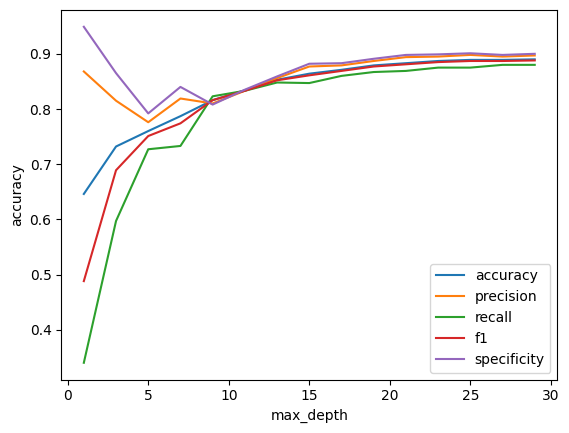

In [17]:
dec_tree_measures = pd.DataFrame(columns=['max_depth', 'accuracy', 'precision', 'recall', 'f1', 'specificity', 'cm'])
parameters = list(range(1, 30, 2)) + [None]

for max_depth in parameters:
    print(f'Fitting model with {max_depth}')
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    measures = get_metrics(y_pred)
    new_row = {'max_depth': max_depth, **measures}
    dec_tree_measures.loc[len(dec_tree_measures)] = new_row


plot_measures(dec_tree_measures)

In [49]:
row = dec_tree_measures[dec_tree_measures['max_depth'] == 15]
models.loc[len(models)] = {'model': 'Decision Tree', **row.iloc[0,1:]}
models

,model,accuracy,precision,recall,f1,specificity,cm
0,Decision Tree,0.864,0.877,0.847,0.861,0.882,"[[17531, 2346], [3016, 16659]]"


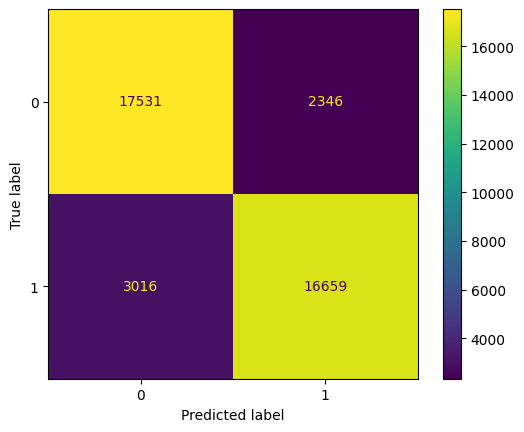

In [19]:
ConfusionMatrixDisplay(row.iloc[0,6]).plot()

## Random Forest

Fitting model with 10
Fitting model with 20
Fitting model with 50
Fitting model with 75
Fitting model with 100
Fitting model with 200
Fitting model with 500


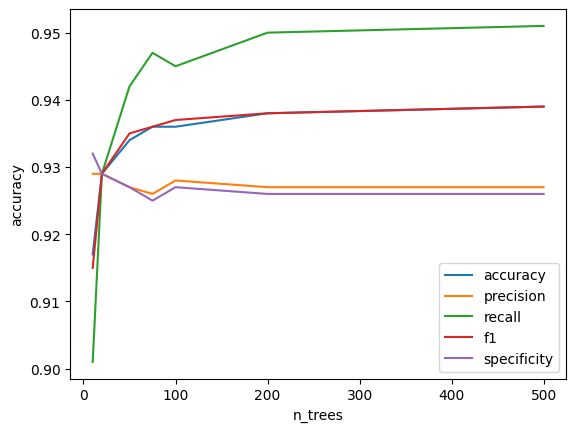

In [20]:
rf_measures = pd.DataFrame(columns=['n_trees', 'accuracy', 'precision', 'recall', 'f1', 'specificity', 'cm'])
parameters = [10, 20, 50, 75, 100, 200, 500]

for n_trees in parameters:
    print(f'Fitting model with {n_trees}')
    model = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    measures = get_metrics(y_pred)
    new_row = {'n_trees': n_trees, **measures}
    rf_measures.loc[len(rf_measures)] = new_row

plot_measures(rf_measures)

In [50]:
row = rf_measures[rf_measures['n_trees'] == 100]
models.loc[len(models)] = {'model': 'Random Forest', **row.iloc[0,1:]}
models

,model,accuracy,precision,recall,f1,specificity,cm
0,Decision Tree,0.864,0.877,0.847,0.861,0.882,"[[17531, 2346], [3016, 16659]]"
1,Random Forest,0.936,0.928,0.945,0.937,0.927,"[[18432, 1445], [1075, 18600]]"


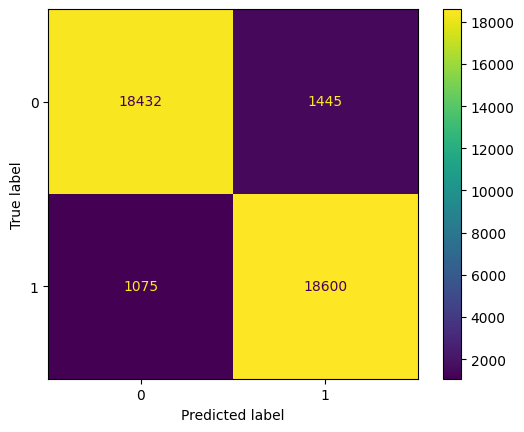

In [22]:
ConfusionMatrixDisplay(row.iloc[0,6]).plot()

## K Nearest Neighbors

Fitting model with 3
Fitting model with 5
Fitting model with 7
Fitting model with 9
Fitting model with 11
Fitting model with 13
Fitting model with 15
Fitting model with 17
Fitting model with 19
Fitting model with 21
Fitting model with 23
Fitting model with 25
Fitting model with 27
Fitting model with 29


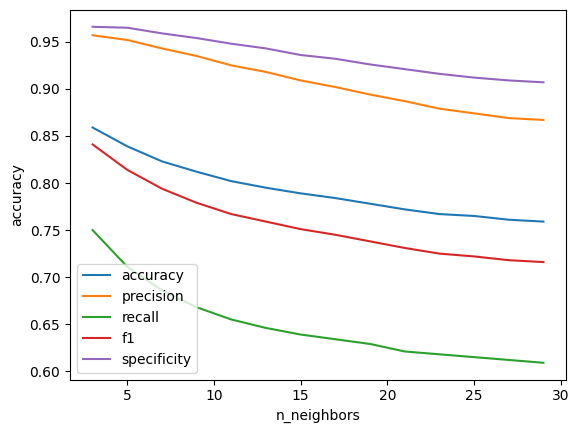

In [23]:
knn_measures = pd.DataFrame(columns=['n_neighbors', 'accuracy', 'precision', 'recall', 'f1', 'specificity', 'cm'])
parameters = list(range(3, 30, 2))

for n_neighbors in parameters:
    print(f'Fitting model with {n_neighbors}')
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    measures = get_metrics(y_pred)
    new_row = {'n_neighbors': n_neighbors, **measures}
    knn_measures.loc[len(knn_measures)] = new_row

plot_measures(knn_measures)

In [51]:
row = knn_measures[knn_measures['n_neighbors'] == 5]
models.loc[len(models)] = {'model': 'KNN', **row.iloc[0,1:]}
models

,model,accuracy,precision,recall,f1,specificity,cm
0,Decision Tree,0.864,0.877,0.847,0.861,0.882,"[[17531, 2346], [3016, 16659]]"
1,Random Forest,0.936,0.928,0.945,0.937,0.927,"[[18432, 1445], [1075, 18600]]"
2,KNN,0.839,0.952,0.711,0.814,0.965,"[[19175, 702], [5677, 13998]]"


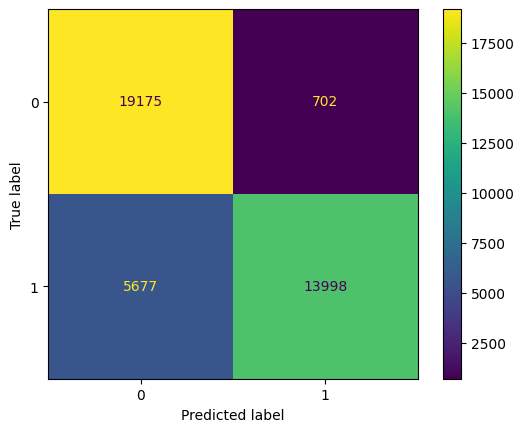

In [25]:
ConfusionMatrixDisplay(row.iloc[0,6]).plot()

## Logistic Regression

In [60]:
parameters = {
    'C': [0.01, 0.1, 1, 10, 50],
    'solver': ['sag', 'saga', 'lbfgs'],
    'max_iter': [500, 1000]
}

grid_search = GridSearchCV(LogisticRegression(), parameters, cv=5, scoring='f1', verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_params

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 5/5] END ..C=0.01, max_iter=500, solver=sag;, score=0.712 total time=   1.8s
[CV 3/5] END ..C=0.01, max_iter=500, solver=sag;, score=0.702 total time=   1.8s
[CV 2/5] END ..C=0.01, max_iter=500, solver=sag;, score=0.708 total time=   1.8s
[CV 4/5] END ..C=0.01, max_iter=500, solver=sag;, score=0.704 total time=   1.8s
[CV 1/5] END ..C=0.01, max_iter=500, solver=sag;, score=0.704 total time=   1.9s
[CV 2/5] END C=0.01, max_iter=500, solver=lbfgs;, score=0.709 total time=   0.4s
[CV 1/5] END C=0.01, max_iter=500, solver=lbfgs;, score=0.704 total time=   0.6s
[CV 3/5] END C=0.01, max_iter=500, solver=lbfgs;, score=0.702 total time=   0.8s
[CV 4/5] END C=0.01, max_iter=500, solver=lbfgs;, score=0.704 total time=   1.0s
[CV 5/5] END C=0.01, max_iter=500, solver=lbfgs;, score=0.712 total time=   0.8s
[CV 2/5] END .C=0.01, max_iter=500, solver=saga;, score=0.708 total time=   3.7s
[CV 1/5] END .C=0.01, max_iter=500, solver=saga

/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .....C=1, max_iter=500, solver=sag;, score=0.710 total time=  18.8s
[CV 2/5] END .....C=1, max_iter=500, solver=sag;, score=0.715 total time=  18.8s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .....C=1, max_iter=500, solver=sag;, score=0.708 total time=  18.7s
[CV 1/5] END ...C=1, max_iter=500, solver=lbfgs;, score=0.710 total time=   1.3s
[CV 2/5] END ...C=1, max_iter=500, solver=lbfgs;, score=0.715 total time=   1.2s
[CV 3/5] END ...C=1, max_iter=500, solver=lbfgs;, score=0.708 total time=   1.6s
[CV 4/5] END ...C=1, max_iter=500, solver=lbfgs;, score=0.708 total time=   0.6s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .....C=1, max_iter=500, solver=sag;, score=0.709 total time=  19.7s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=1, max_iter=500, solver=saga;, score=0.710 total time=  19.6s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .....C=1, max_iter=500, solver=sag;, score=0.719 total time=  19.8s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=1, max_iter=500, solver=saga;, score=0.714 total time=  20.1s
[CV 5/5] END ...C=1, max_iter=500, solver=lbfgs;, score=0.719 total time=   1.8s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=1, max_iter=500, solver=saga;, score=0.708 total time=  19.5s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=1, max_iter=500, solver=saga;, score=0.708 total time=  19.0s
[CV 5/5] END ....C=1, max_iter=500, solver=saga;, score=0.719 total time=  19.1s
[CV 1/5] END ....C=1, max_iter=1000, solver=sag;, score=0.710 total time=  21.2s
[CV 2/5] END ....C=1, max_iter=1000, solver=sag;, score=0.715 total time=  20.9s
[CV 4/5] END ....C=1, max_iter=1000, solver=sag;, score=0.709 total time=  20.9s
[CV 5/5] END ....C=1, max_iter=1000, solver=sag;, score=0.719 total time=  20.7s
[CV 3/5] END ....C=1, max_iter=1000, solver=sag;, score=0.708 total time=  21.8s
[CV 1/5] END ..C=1, max_iter=1000, solver=lbfgs;, score=0.710 total time=   1.2s
[CV 2/5] END ..C=1, max_iter=1000, solver=lbfgs;, score=0.715 total time=   1.2s
[CV 4/5] END ..C=1, max_iter=1000, solver=lbfgs;, score=0.708 total time=   0.5s
[CV 3/5] END ..C=1, max_iter=1000, solver=lbfgs;, score=0.708 total time=   1.4s
[CV 5/5] END ..C=1, max_iter=1000, solver=lbfgs;, score=0.719 total time=   1.8s
[CV 1/5] END ...C=1, max_ite

/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=10, max_iter=500, solver=sag;, score=0.715 total time=  18.0s
[CV 1/5] END ....C=10, max_iter=500, solver=sag;, score=0.711 total time=  18.3s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=10, max_iter=500, solver=sag;, score=0.708 total time=  18.5s
[CV 2/5] END ...C=1, max_iter=1000, solver=saga;, score=0.715 total time=  32.7s
[CV 3/5] END ...C=1, max_iter=1000, solver=saga;, score=0.708 total time=  33.0s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=10, max_iter=500, solver=sag;, score=0.709 total time=  18.8s
[CV 5/5] END ...C=1, max_iter=1000, solver=saga;, score=0.719 total time=  33.0s
[CV 4/5] END ...C=1, max_iter=1000, solver=saga;, score=0.709 total time=  34.1s
[CV 1/5] END ..C=10, max_iter=500, solver=lbfgs;, score=0.711 total time=   1.4s
[CV 3/5] END ..C=10, max_iter=500, solver=lbfgs;, score=0.709 total time=   1.0s
[CV 2/5] END ..C=10, max_iter=500, solver=lbfgs;, score=0.715 total time=   1.8s
[CV 4/5] END ..C=10, max_iter=500, solver=lbfgs;, score=0.710 total time=   1.1s
[CV 5/5] END ..C=10, max_iter=500, solver=lbfgs;, score=0.720 total time=   1.6s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...C=10, max_iter=500, solver=saga;, score=0.711 total time=  18.3s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=10, max_iter=500, solver=sag;, score=0.719 total time=  19.0s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...C=10, max_iter=500, solver=saga;, score=0.715 total time=  18.4s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ...C=10, max_iter=500, solver=saga;, score=0.708 total time=  18.3s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ...C=10, max_iter=500, solver=saga;, score=0.709 total time=  18.4s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ...C=10, max_iter=500, solver=saga;, score=0.719 total time=  18.2s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...C=10, max_iter=1000, solver=sag;, score=0.711 total time=  36.3s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...C=10, max_iter=1000, solver=sag;, score=0.715 total time=  36.1s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ...C=10, max_iter=1000, solver=sag;, score=0.709 total time=  35.7s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ...C=10, max_iter=1000, solver=sag;, score=0.709 total time=  35.6s
[CV 1/5] END .C=10, max_iter=1000, solver=lbfgs;, score=0.711 total time=   1.5s
[CV 2/5] END .C=10, max_iter=1000, solver=lbfgs;, score=0.715 total time=   1.8s
[CV 3/5] END .C=10, max_iter=1000, solver=lbfgs;, score=0.709 total time=   0.9s
[CV 5/5] END ...C=10, max_iter=1000, solver=sag;, score=0.720 total time=  36.4s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .C=10, max_iter=1000, solver=lbfgs;, score=0.710 total time=   1.2s
[CV 5/5] END .C=10, max_iter=1000, solver=lbfgs;, score=0.720 total time=   1.8s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ..C=10, max_iter=1000, solver=saga;, score=0.715 total time=  36.7s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ..C=10, max_iter=1000, solver=saga;, score=0.711 total time=  37.7s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ..C=10, max_iter=1000, solver=saga;, score=0.708 total time=  37.2s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=50, max_iter=500, solver=sag;, score=0.710 total time=  18.8s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=50, max_iter=500, solver=sag;, score=0.715 total time=  18.5s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=50, max_iter=500, solver=sag;, score=0.708 total time=  18.0s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=50, max_iter=500, solver=sag;, score=0.709 total time=  18.3s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=50, max_iter=500, solver=sag;, score=0.719 total time=  18.3s
[CV 1/5] END ..C=50, max_iter=500, solver=lbfgs;, score=0.711 total time=   1.5s
[CV 2/5] END ..C=50, max_iter=500, solver=lbfgs;, score=0.715 total time=   2.3s
[CV 3/5] END ..C=50, max_iter=500, solver=lbfgs;, score=0.709 total time=   1.8s
[CV 4/5] END ..C=50, max_iter=500, solver=lbfgs;, score=0.710 total time=   0.6s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...C=50, max_iter=500, solver=saga;, score=0.711 total time=  18.7s
[CV 5/5] END ..C=50, max_iter=500, solver=lbfgs;, score=0.720 total time=   1.5s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ..C=10, max_iter=1000, solver=saga;, score=0.709 total time=  38.0s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ..C=10, max_iter=1000, solver=saga;, score=0.719 total time=  38.7s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...C=50, max_iter=500, solver=saga;, score=0.715 total time=  19.4s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ...C=50, max_iter=500, solver=saga;, score=0.708 total time=  19.2s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ...C=50, max_iter=500, solver=saga;, score=0.708 total time=  19.3s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ...C=50, max_iter=500, solver=saga;, score=0.719 total time=  19.1s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...C=50, max_iter=1000, solver=sag;, score=0.711 total time=  33.8s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...C=50, max_iter=1000, solver=sag;, score=0.715 total time=  33.6s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ...C=50, max_iter=1000, solver=sag;, score=0.709 total time=  33.4s
[CV 1/5] END .C=50, max_iter=1000, solver=lbfgs;, score=0.711 total time=   1.4s
[CV 4/5] END ...C=50, max_iter=1000, solver=sag;, score=0.709 total time=  33.6s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .C=50, max_iter=1000, solver=lbfgs;, score=0.709 total time=   2.4s
[CV 2/5] END .C=50, max_iter=1000, solver=lbfgs;, score=0.715 total time=   2.6s
[CV 4/5] END .C=50, max_iter=1000, solver=lbfgs;, score=0.710 total time=   0.7s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ...C=50, max_iter=1000, solver=sag;, score=0.720 total time=  34.1s
[CV 5/5] END .C=50, max_iter=1000, solver=lbfgs;, score=0.720 total time=   1.5s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ..C=50, max_iter=1000, solver=saga;, score=0.710 total time=  34.2s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ..C=50, max_iter=1000, solver=saga;, score=0.715 total time=  34.2s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ..C=50, max_iter=1000, solver=saga;, score=0.708 total time=  33.8s


/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fpana/opt/anaconda3/envs/icd/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ..C=50, max_iter=1000, solver=saga;, score=0.719 total time=  22.4s
[CV 4/5] END ..C=50, max_iter=1000, solver=saga;, score=0.709 total time=  22.7s


{'C': 50, 'max_iter': 500, 'solver': 'lbfgs'}

In [26]:
best_params = {'C': 50, 'max_iter': 500, 'solver': 'lbfgs'}

In [27]:
lr = LogisticRegression(**best_params)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
measures = get_metrics(y_pred)
measures

{'accuracy': 0.727,
 'precision': np.float64(0.749),
 'recall': np.float64(0.678),
 'f1': np.float64(0.712),
 'specificity': np.float64(0.775),
 'cm': array([[15398,  4479],
        [ 6326, 13349]])}

In [52]:
models.loc[len(models)] = {'model': 'Logistic Regression', **measures}
models

,model,accuracy,precision,recall,f1,specificity,cm
0,Decision Tree,0.864,0.877,0.847,0.861,0.882,"[[17531, 2346], [3016, 16659]]"
1,Random Forest,0.936,0.928,0.945,0.937,0.927,"[[18432, 1445], [1075, 18600]]"
2,KNN,0.839,0.952,0.711,0.814,0.965,"[[19175, 702], [5677, 13998]]"
3,Logistic Regression,0.697,0.808,0.512,0.627,0.880,"[[17492, 2385], [9608, 10067]]"


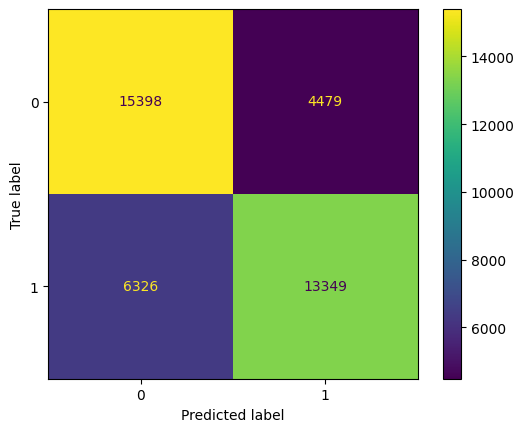

In [29]:
ConfusionMatrixDisplay(measures['cm']).plot()

## Support Vector Machine

In [71]:
# TODO?

## Multi-Layer Perceptron (Neural Network)

In [64]:
parameters = {
    'hidden_layer_sizes': [(10,), (12, 6), (13,9,5)],
    'activation': ['logistic', 'relu'],
    'solver': ['adam'],
    'max_iter': [500, 1000],
    'random_state': [42],
    'learning_rate_init': [0.001, 0.01, 0.1],
}

grid_search = GridSearchCV(MLPClassifier(), parameters, cv=5, scoring='f1', verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_params

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END activation=logistic, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=adam;, score=0.742 total time=  25.8s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam;, score=0.742 total time=  26.4s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=adam;, score=0.745 total time=  27.4s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=500, random_state=42, solver=adam;, score=0.749 total time=  27.9s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=adam;, score=0.735 total time=  27.7s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=1000, random_state=42, solver=a

{'activation': 'logistic',
 'hidden_layer_sizes': (13, 9, 5),
 'learning_rate_init': 0.01,
 'max_iter': 500,
 'random_state': 42,
 'solver': 'adam'}

In [30]:
best_params = {'activation': 'logistic',
                'hidden_layer_sizes': (13, 9, 5),
                'learning_rate_init': 0.01,
                'max_iter': 500,
                'random_state': 42,
                'solver': 'adam'}

In [31]:
mlp = MLPClassifier(**best_params)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
measures = get_metrics(y_pred)
measures

{'accuracy': 0.763,
 'precision': np.float64(0.789),
 'recall': np.float64(0.714),
 'f1': np.float64(0.75),
 'specificity': np.float64(0.81),
 'cm': array([[16108,  3769],
        [ 5622, 14053]])}

In [53]:
models.loc[len(models)] = {'model': 'MLP', **measures}
models

,model,accuracy,precision,recall,f1,specificity,cm
0,Decision Tree,0.864,0.877,0.847,0.861,0.882,"[[17531, 2346], [3016, 16659]]"
1,Random Forest,0.936,0.928,0.945,0.937,0.927,"[[18432, 1445], [1075, 18600]]"
2,KNN,0.839,0.952,0.711,0.814,0.965,"[[19175, 702], [5677, 13998]]"
3,Logistic Regression,0.697,0.808,0.512,0.627,0.880,"[[17492, 2385], [9608, 10067]]"
4,MLP,0.697,0.808,0.512,0.627,0.880,"[[17492, 2385], [9608, 10067]]"


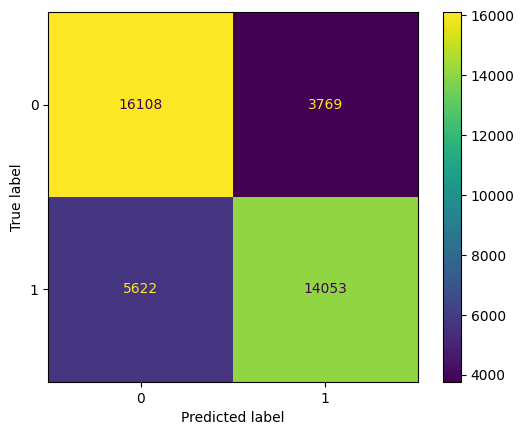

In [33]:
ConfusionMatrixDisplay(measures['cm']).plot()

## Bayesian Classifier

In [35]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
measures = get_metrics(y_pred)
measures

{'accuracy': 0.697,
 'precision': np.float64(0.808),
 'recall': np.float64(0.512),
 'f1': np.float64(0.627),
 'specificity': np.float64(0.88),
 'cm': array([[17492,  2385],
        [ 9608, 10067]])}

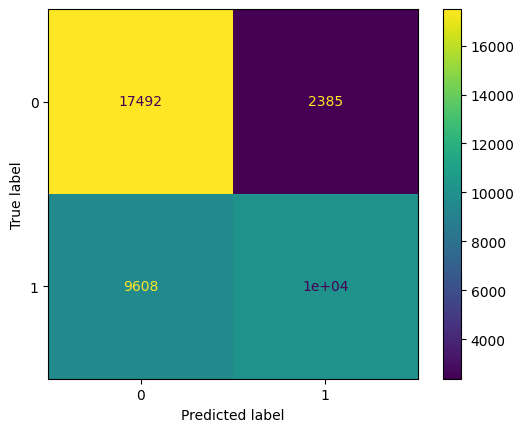

In [36]:
ConfusionMatrixDisplay(measures['cm']).plot()

In [54]:
models.loc[len(models)] = {'model': 'Naive Bayes', **measures}
models

,model,accuracy,precision,recall,f1,specificity,cm
0,Decision Tree,0.864,0.877,0.847,0.861,0.882,"[[17531, 2346], [3016, 16659]]"
1,Random Forest,0.936,0.928,0.945,0.937,0.927,"[[18432, 1445], [1075, 18600]]"
2,KNN,0.839,0.952,0.711,0.814,0.965,"[[19175, 702], [5677, 13998]]"
3,Logistic Regression,0.697,0.808,0.512,0.627,0.880,"[[17492, 2385], [9608, 10067]]"
4,MLP,0.697,0.808,0.512,0.627,0.880,"[[17492, 2385], [9608, 10067]]"
5,Naive Bayes,0.697,0.808,0.512,0.627,0.880,"[[17492, 2385], [9608, 10067]]"


## Overall comparison of the models

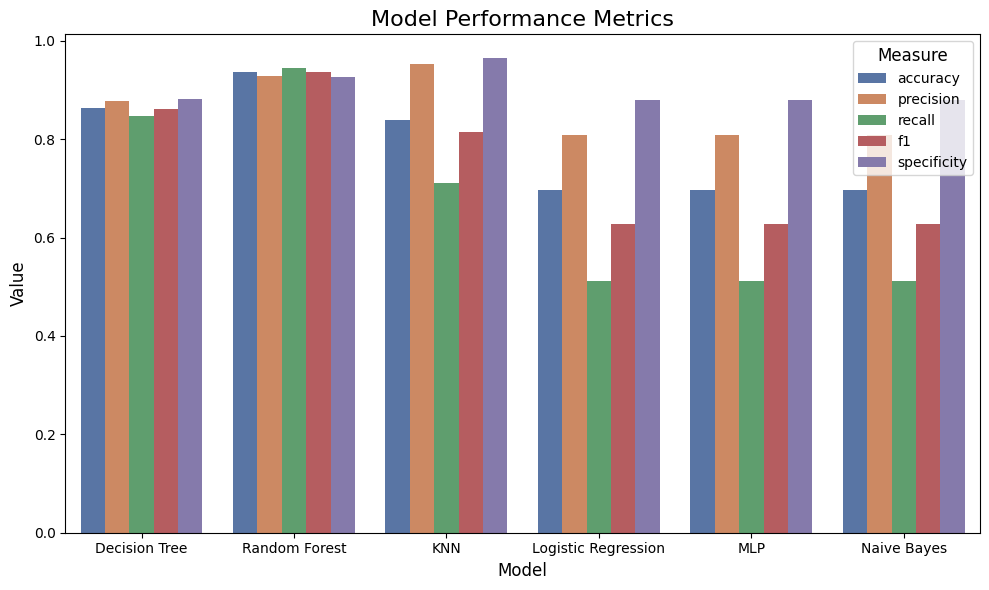

In [55]:
melted = models.melt(id_vars="model", value_vars=["accuracy", "precision", "recall", "f1", "specificity"],
                     var_name="measure", value_name="value")

plt.figure(figsize=(10, 6))
sns.barplot(data=melted, x="model", y="value", hue="measure", palette="deep")

plt.title("Model Performance Metrics", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Measure", fontsize=10, title_fontsize=12)
plt.tight_layout()

plt.show()

After this analysis, we chose the Random Forest (100 trees) as the best model to make the final predictions.